<b><h1>What makes a high quality wine?

<b>Goals: To explore gathered data sources using clustering to identify features that are important to predicting wine quality.

Imports

In [1]:
import wrangle
import env

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import os
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

#imports for regression modeling

from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#feature selection
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

<b><h4>Acquire and Prepare Data

In [2]:
from wrangle import acquire_data
wines = acquire_data()
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine_Color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White Wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White Wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White Wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine


<b><h4>Split the Data

In [3]:
from wrangle import split_data
train, validate, test = split_data(wines)

<b><h4>Explore the Data

- Which 3 features have the highest correlation with the target?
- Is there a relationship between citric_acid and pH?
- Is there a relationship between sulphates and free sulfur dioxide?
- Is there a relationship between alcohol and free sulfur dioxide?

<b><h4>Which 3 features have the highest correlation with the target?

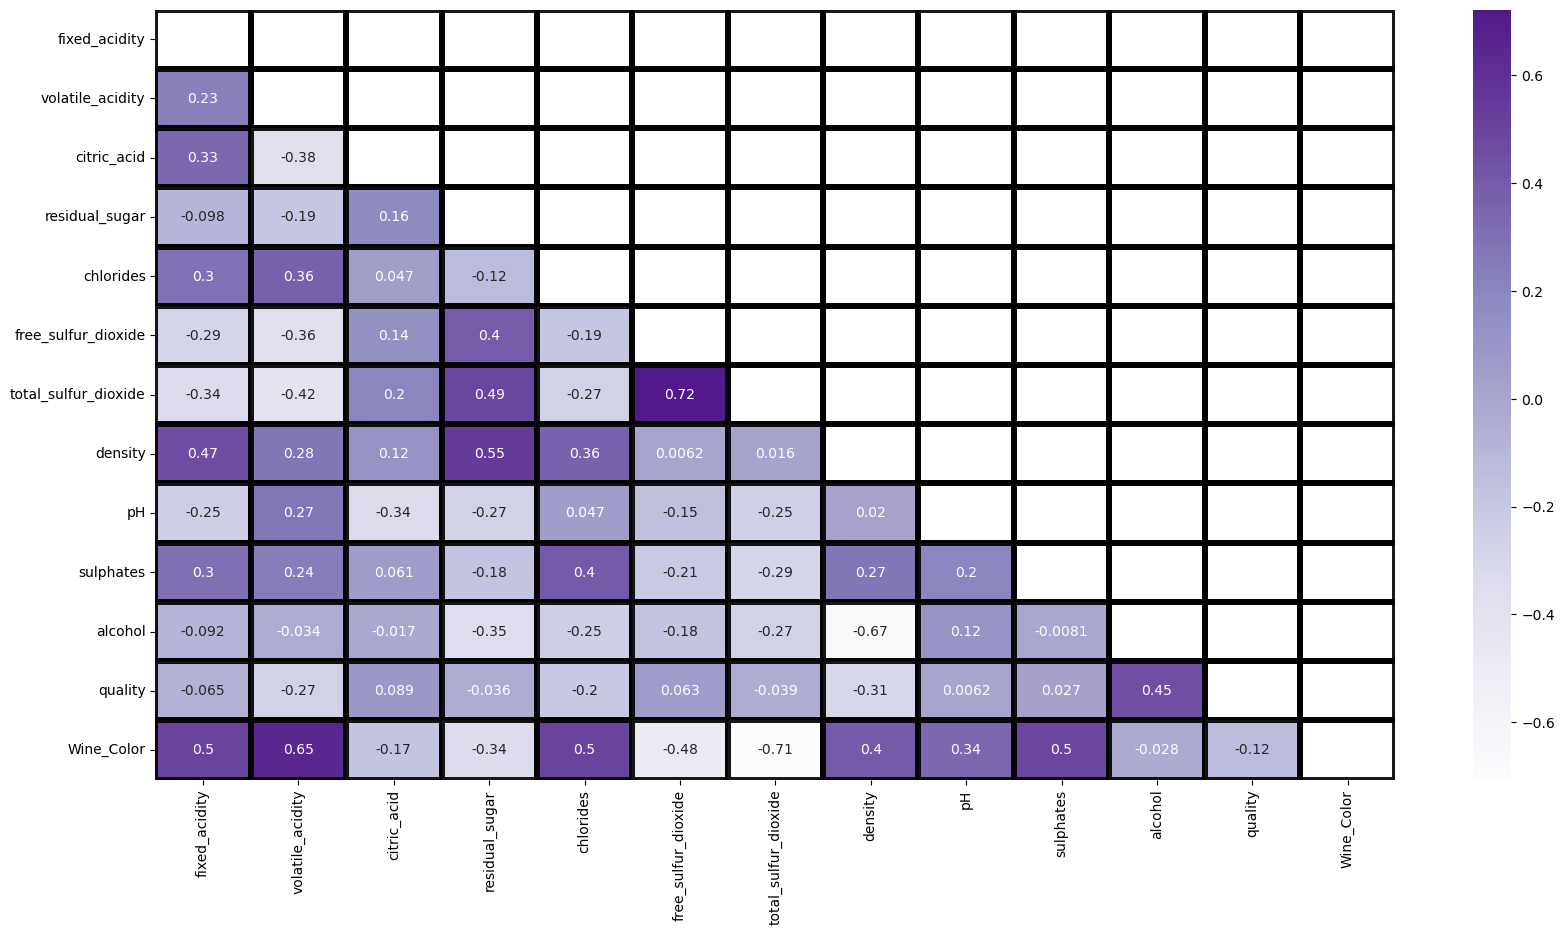

In [4]:
from wrangle import heatmap
heatmap(train)

<b>The top 3 features correlated with Quality are:\
    alcohol\
    citric_acid\
    free_sulfur_dioxide

<b><h2>Is there a relationship between citric_acid and pH?

<Axes: xlabel='citric_acid', ylabel='pH'>

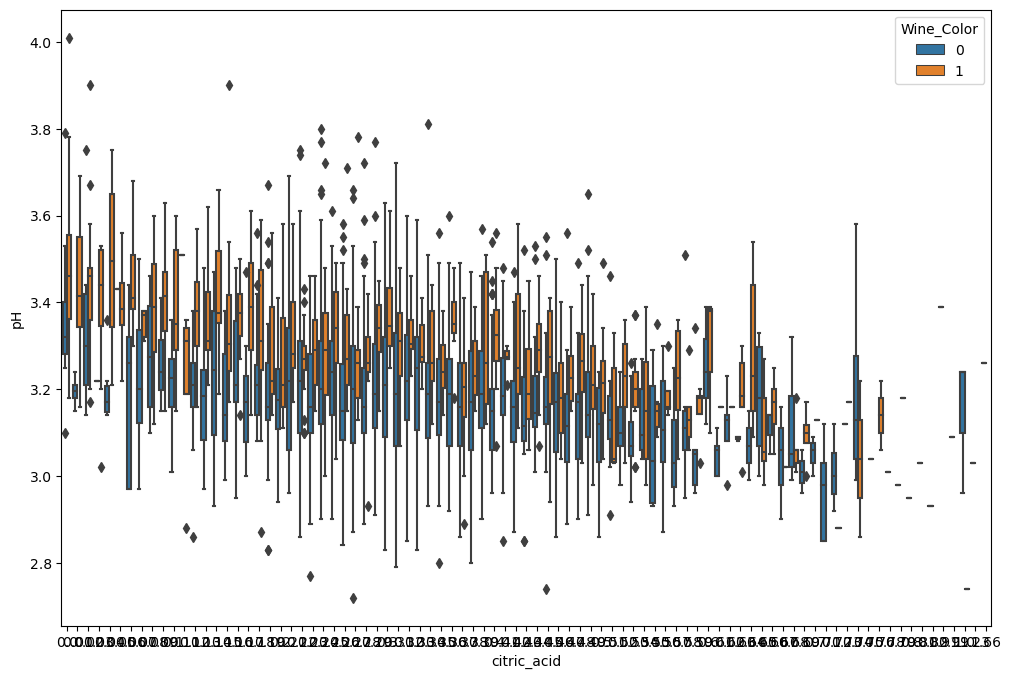

In [5]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='citric_acid', y='pH', hue='Wine_Color')


H_$0$: There is no linear correlation between citric acid and pH.\
H_$a$: There is A linear correlation between citric acid and pH.

In [6]:
# run stats test
r, p = stats.pearsonr(train.citric_acid, train.pH)
print(f'Correlation Coefficient: {r} , P-value: {p}')

Correlation Coefficient: -0.34360296907558574 , P-value: 2.6150742363664177e-101


<b>The P-value is less than alpha (0.05), thus we REJECT our null hypothesis. There is A linear correlation between these features.

<b><h3>What clusters exist with citric_acid and pH?

<Figure size 1400x900 with 0 Axes>

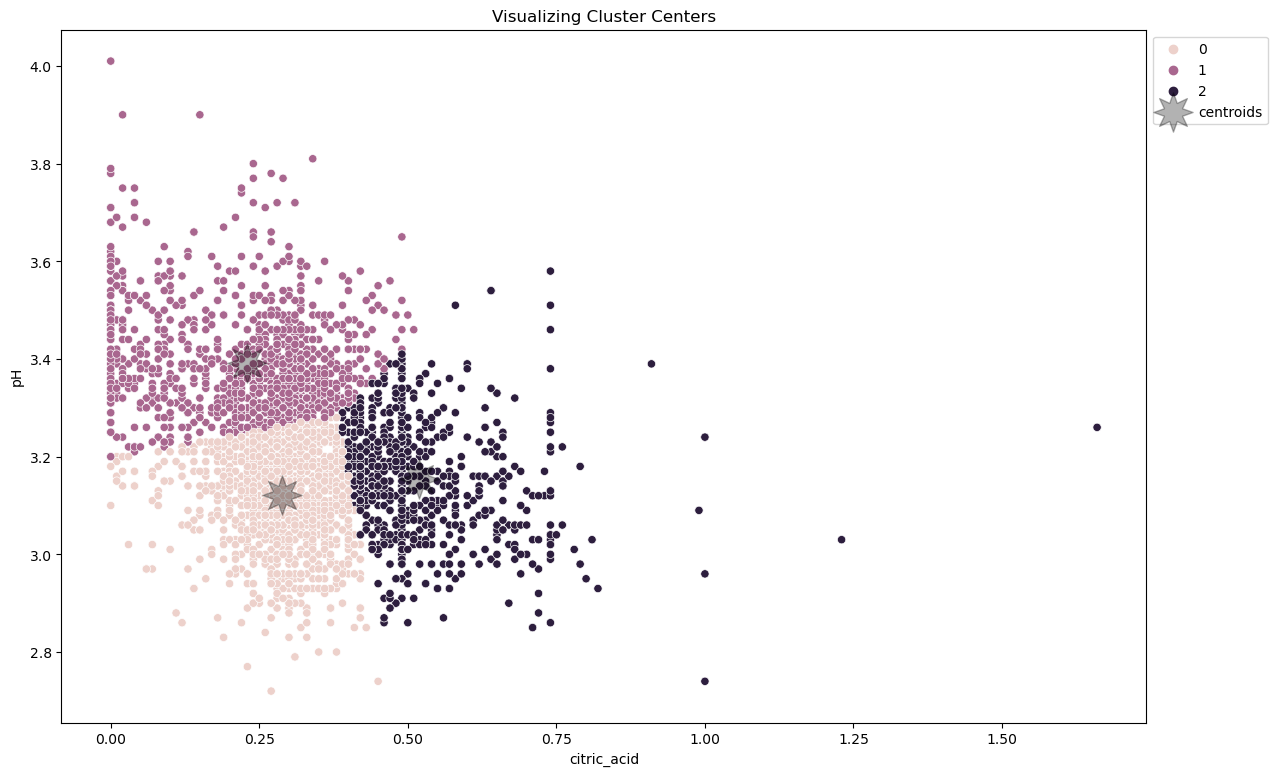

In [7]:
from wrangle import cluster1
cluster1 = cluster1(train)

<b><h2>Is there a relationship between sulphates and free sulfur dioxide?

<Axes: xlabel='free_sulfur_dioxide', ylabel='sulphates'>

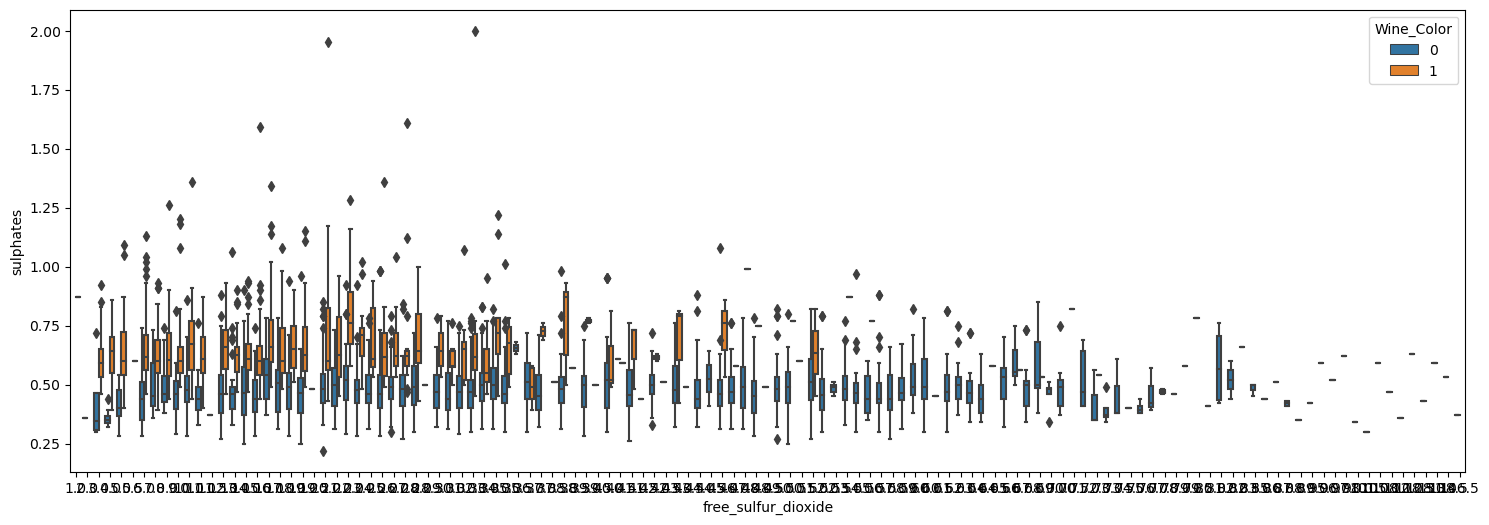

In [8]:
plt.figure(figsize=(18,6))
sns.boxplot(data=train, x='free_sulfur_dioxide', y='sulphates', hue='Wine_Color')

H_$0$: There is no linear correlation between free_sulfur_dioxide and sulphates.\
H_$a$: There is A linear correlation between free_sulfur_dioxide and sulphates.

In [9]:
# run stats test
r, p = stats.pearsonr(train.free_sulfur_dioxide, train.sulphates)
print(f'Correlation Coefficient: {r} , P-value: {p}')

Correlation Coefficient: -0.2103745702476299 , P-value: 1.1634286945736694e-37


<b>The P-value is less than alpha (0.05), thus we REJECT our null hypothesis. There is A linear correlation between these features.

<b><h3>What clusters exist with quality and alcohol?

<Figure size 1400x900 with 0 Axes>

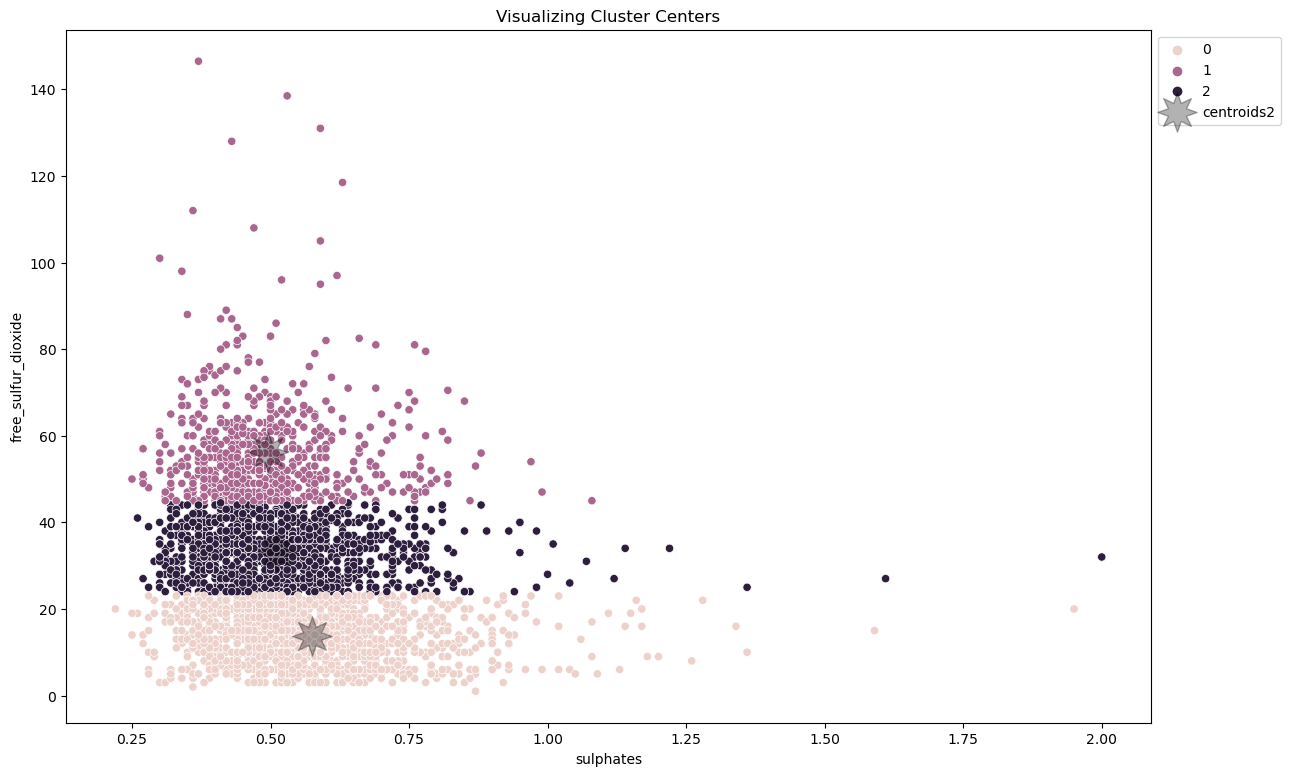

In [10]:
from wrangle import cluster2
cluster2 = cluster2(train)

<b><h2>Is there a relationship between alcohol and free sulfur dioxide?

<Axes: xlabel='alcohol', ylabel='free_sulfur_dioxide'>

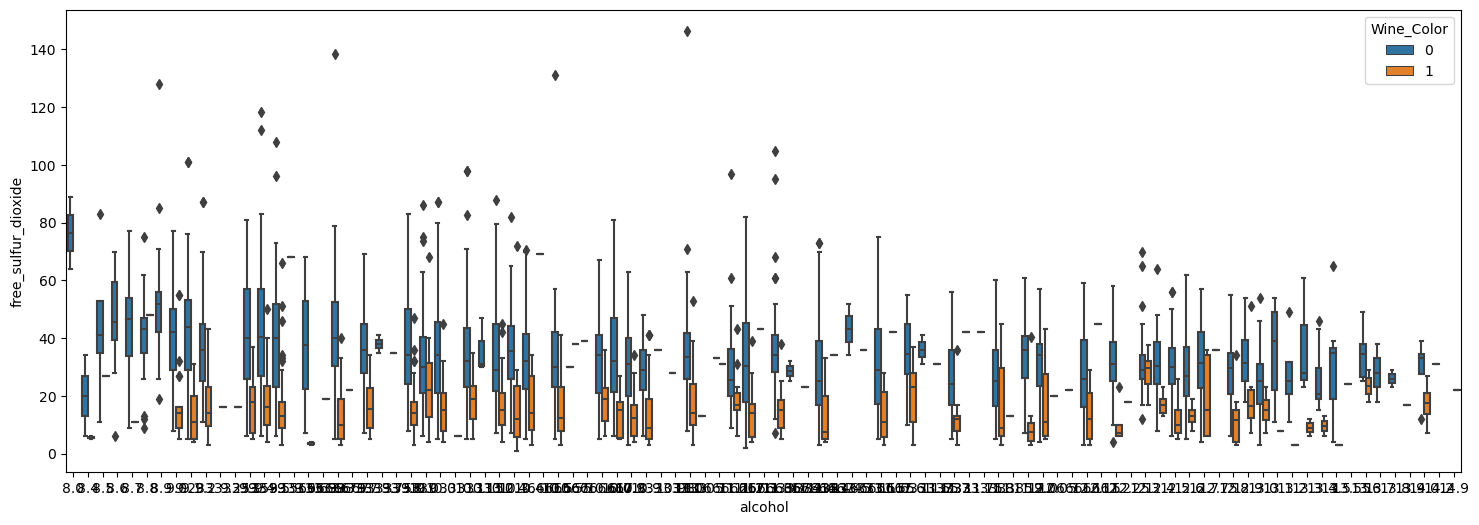

In [11]:
plt.figure(figsize=(18,6))
sns.boxplot(data=train, x='alcohol', y='free_sulfur_dioxide', hue='Wine_Color')

H_$0$: There is no linear correlation between free_sulfur_dioxide and alcohol.\
H_$a$: There is A linear correlation between free_sulfur_dioxide and alcohol.

In [12]:
# run stats test
r, p = stats.pearsonr(train.free_sulfur_dioxide, train.alcohol)
print(f'Correlation Coefficient: {r} , P-value: {p}')

Correlation Coefficient: -0.17841731832293714 , P-value: 2.145361449045013e-27


<b>The P-value is less than alpha (0.05), thus we REJECT our null hypothesis. There is A linear correlation between these features.

<b><h3>What clusters exist with quality and free_sulfur_dioxide?

<Figure size 1400x900 with 0 Axes>

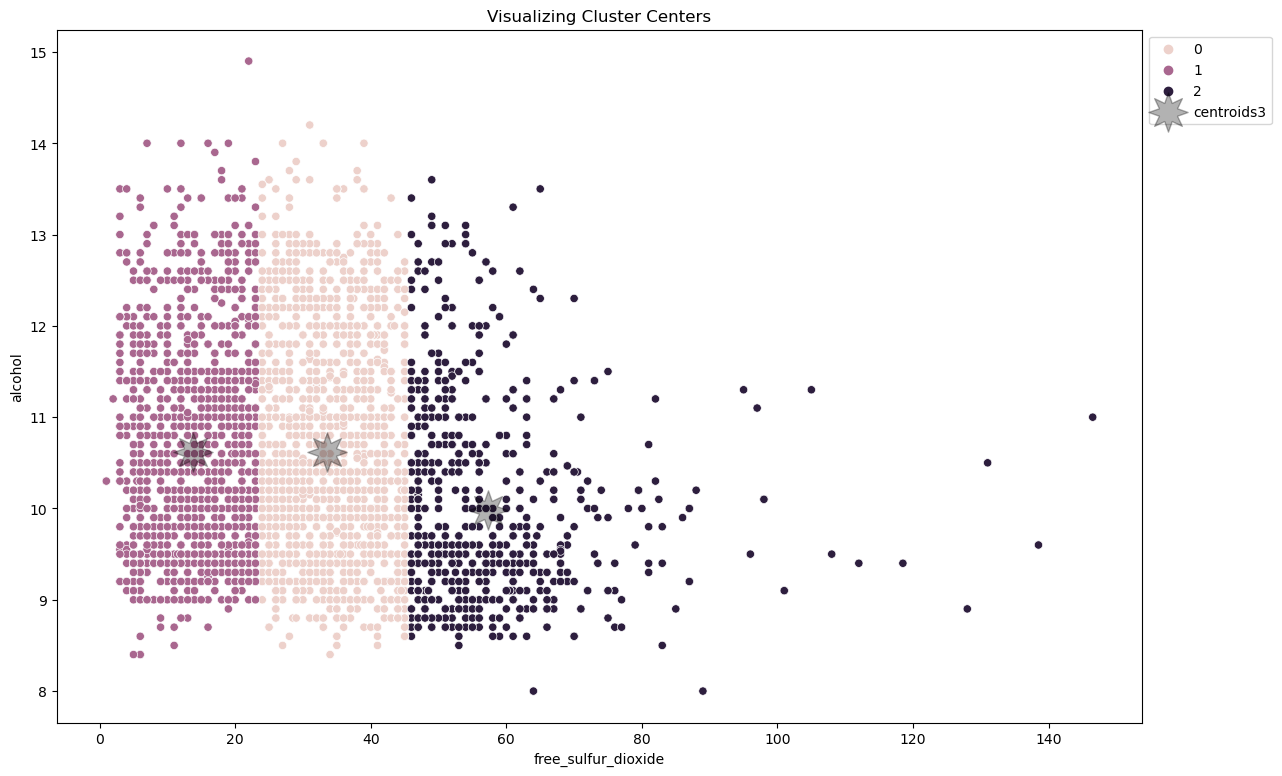

In [13]:
from wrangle import cluster3
cluster3 = cluster3(train)

<b><h2>Exploration Summary

<b><h2>Modeling

In [14]:
from wrangle import acquire_data
wines = acquire_data()

In [15]:
from wrangle import split_data
train, validate, test = split_data(wines)

In [24]:
from wrangle import scale_the_data
preprocessed_train, preprocessed_validate, preprocessed_test = scale_the_data(train, validate, test)

In [17]:
from wrangle import get_baseline
baseline, baseline_rmse = get_baseline(preprocessed_train)
#'Red Wine'= 1, 'White Wine'= 0
baseline

0.8835239836717925

In [23]:
from wrangle import break_em_out
X_train, y_train, X_val, y_val, X_test, y_test = break_em_out(preprocessed_train, preprocessed_validate, preprocessed_test)

<b><h3>Model 1: Ordinary Least Squares (OLS)

In [19]:
from wrangle import OLS
OLS(X_train, y_train, baseline, X_val, y_val)

OLS Regressor 
RMSE_train 0.7361984264238159 
RMSE_validate 0.721125474006593 
R2_validate 0.28764309488989326


<b><h3>Model 2: LassoLars

In [20]:
from wrangle import LassoLars
LassoLars(X_train, y_train, baseline, X_val, y_val)

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 0.8835239836717925, 
Validation/Out-of-Sample:  0.8540386327640838
Difference:  -0.029485350907708763


<b><h3>Model 3: Generalized Linear Model (GLM)

In [21]:
from wrangle import GLM
GLM(X_train, y_train, baseline, X_val, y_val)

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 0.8452868772490062, 
Validation/Out-of-Sample:  0.8175657179961588
Difference:  -0.02772115925284735


<b><h2>Final Best Model on Test Data - Ordinary Least Squares

In [22]:
from wrangle import OLS_test
OLS_test(X_train, y_train, baseline, X_val, y_val, X_test, y_test)

RMSE for Ordinary Least Squares Test Model
_____________________________________________
Baseline: 0.8835239836717925
Training/In-Sample:  0.7361984264238159 
Validation/Out-of-Sample:  0.721125474006593
Test/Out-of-Sample: 0.7362265073933467
difference:  0.015101033386753726


<b>Ordinary Least Squares is the best performing model with approximately 74% accuracy on unseen data.

<b><h2>Next Steps

<b><h2>Recommendations